### **Kasus: Prediksi Harga Laptop pada E-Commerce**

**Tujuan Bisnis**: Meningkatkan penjualan dengan menetapkan harga yang kompetitif untuk laptop yang dijual berdasarkan spesifikasi.

**Tujuan Analitik**: Mengembangkan model prediksi harga laptop berdasarkan fitur-fitur seperti brand, RAM, processor, dan GPU.

**Kriteria Sukses**: Model prediksi harga harus dapat memprediksi harga dengan akurasi minimal 80%, memungkinkan penetapan harga yang lebih tepat dan meningkatkan daya saing produk di pasar.

## **Dataset**

Dataset **Laptop Price Prediction** berisi 11,768 data laptop dengan berbagai spesifikasi perangkat keras dan harga. Dataset ini mencakup fitur-fitur seperti **brand**, **processor**, **RAM (GB)**, **storage**, **GPU**, **screen size**, **resolution**, **battery life**, **weight**, **operating system**, dan **price**. Dataset ini dirancang untuk analisis harga, prediksi harga laptop, dan untuk memahami faktor-faktor yang mempengaruhi harga laptop berdasarkan spesifikasi teknis yang ada.

Brand: Nama produsen laptop (misalnya Dell, HP, Apple).

Processor: Model CPU laptop (misalnya Intel i5, AMD Ryzen 7).

RAM (GB): Ukuran RAM dalam gigabyte (misalnya 4GB, 8GB).

Storage: Tipe dan kapasitas penyimpanan (misalnya 256GB SSD, 1TB HDD).

GPU: Jenis kartu grafis (misalnya Nvidia GTX 1650, integrated).

Screen Size (inch): Ukuran layar laptop dalam inci (misalnya 15.6").

Resolution: Resolusi layar (misalnya 1920x1080).

Battery Life (hours): Waktu hidup baterai dalam jam (misalnya 8 jam).

Weight (kg): Berat laptop dalam kilogram (misalnya 1.5kg).

Operating System: Sistem operasi yang digunakan (misalnya Windows, macOS).

Price ($): Harga laptop dalam dolar AS.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("laptop_prices.csv")

In [2]:
df.head(10)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
5,Acer,AMD Ryzen 3,64,2TB SSD,Nvidia RTX 3060,14.0,1366x768,7.1,1.85,Linux,1676.64
6,Dell,Intel i5,8,1TB SSD,Nvidia RTX 2060,15.6,2560x1440,9.1,1.98,Windows,1449.05
7,Microsoft,AMD Ryzen 9,8,1TB SSD,Nvidia RTX 3080,17.3,2560x1440,9.8,1.26,Linux,2193.55
8,Apple,Intel i5,64,256GB SSD,Nvidia RTX 2060,15.6,3840x2160,11.5,1.48,Linux,6409.03
9,HP,AMD Ryzen 5,4,1TB SSD,AMD Radeon RX 6800,14.0,3840x2160,7.5,2.19,FreeDOS,1556.72


In [3]:
df.tail()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,1579.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [5]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [40]:
df['Brand'].mode()

0    Apple
Name: Brand, dtype: object

In [6]:
df.shape

(11768, 11)

In [7]:
df.columns

Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')

In [10]:
df.dtypes

Brand                    object
Processor                object
RAM (GB)                  int64
Storage                  object
GPU                      object
Screen Size (inch)      float64
Resolution               object
Battery Life (hours)    float64
Weight (kg)             float64
Operating System         object
Price ($)               float64
dtype: object

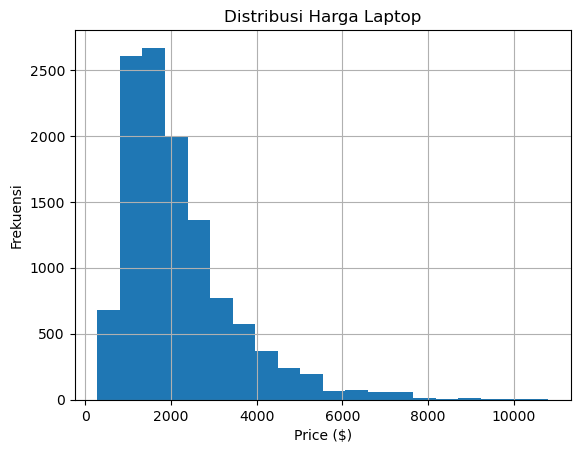

In [18]:
import matplotlib.pyplot as plt

df['Price ($)'].hist(bins=20)
plt.title("Distribusi Harga Laptop")
plt.xlabel("Price ($)")
plt.ylabel("Frekuensi")
plt.show()

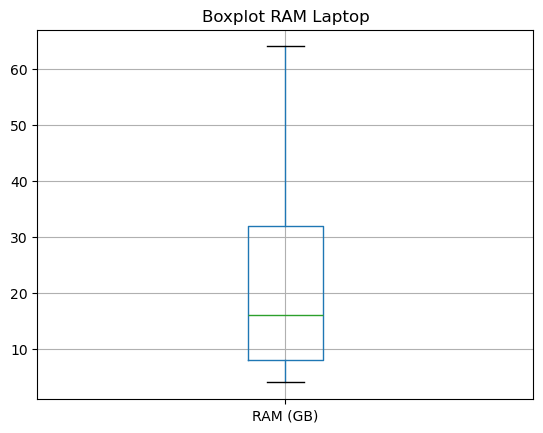

In [19]:
df.boxplot(column='RAM (GB)')
plt.title("Boxplot RAM Laptop")
plt.show()

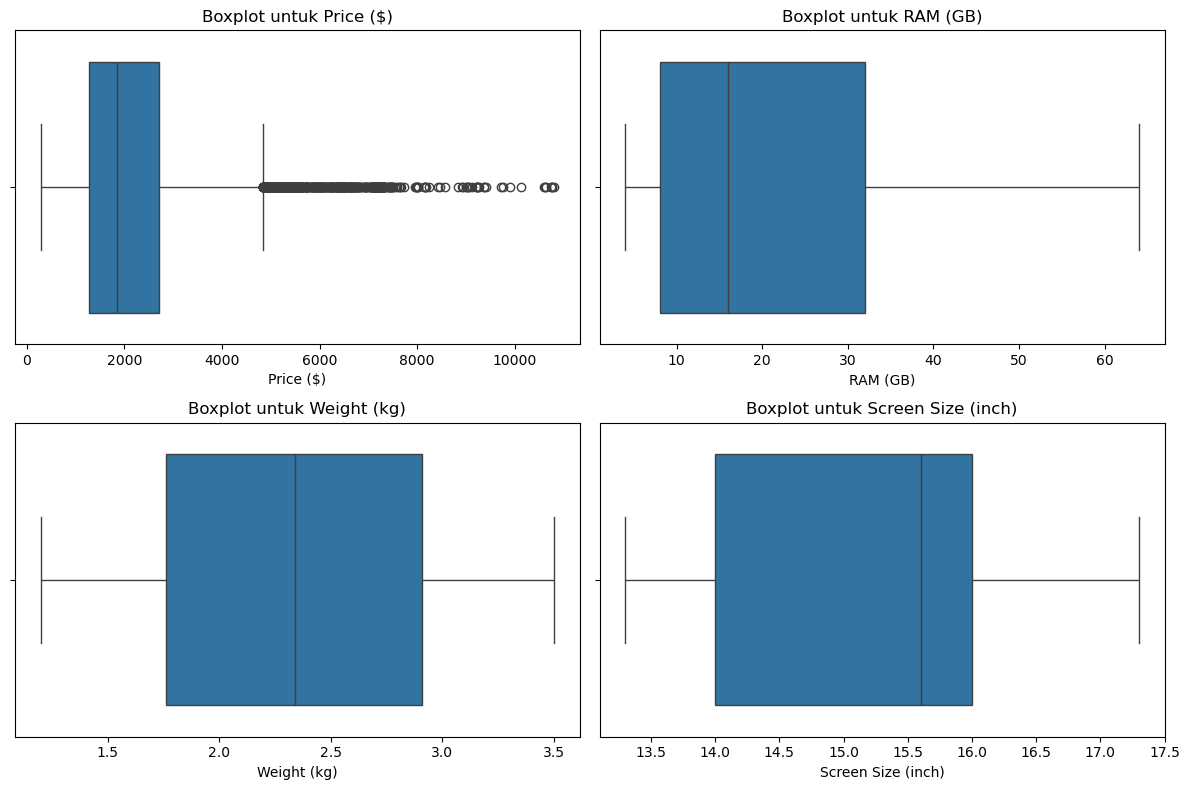

In [21]:
import seaborn as sns

numerical_cols = ['Price ($)', 'RAM (GB)', 'Weight (kg)', 'Screen Size (inch)'] 
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i) 
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot untuk {col}")

plt.tight_layout()
plt.show()

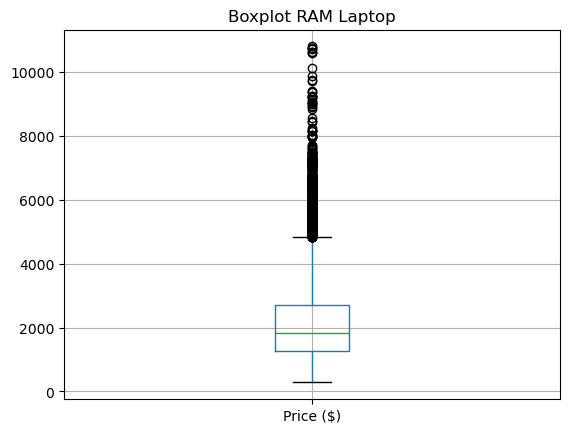

In [22]:
df.boxplot(column='Price ($)')
plt.title("Boxplot RAM Laptop")
plt.show()

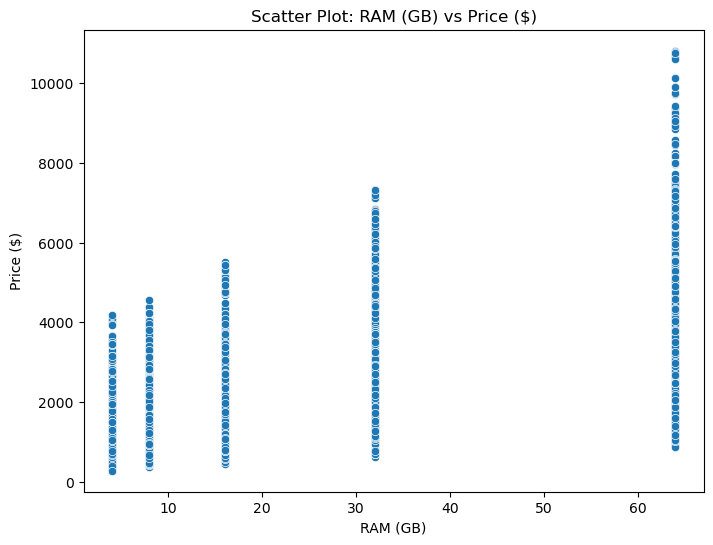

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['RAM (GB)'], y=df['Price ($)'])
plt.title("Scatter Plot: RAM (GB) vs Price ($)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.show()

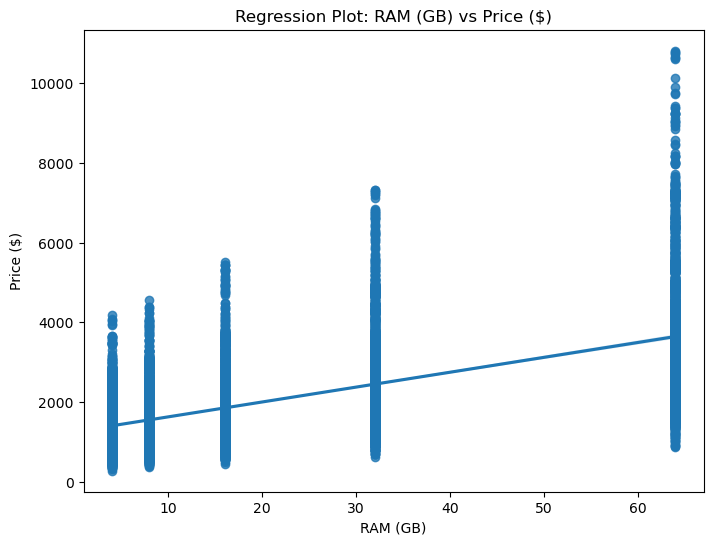

In [41]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df['RAM (GB)'], y=df['Price ($)'])
plt.title("Regression Plot: RAM (GB) vs Price ($)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.show()

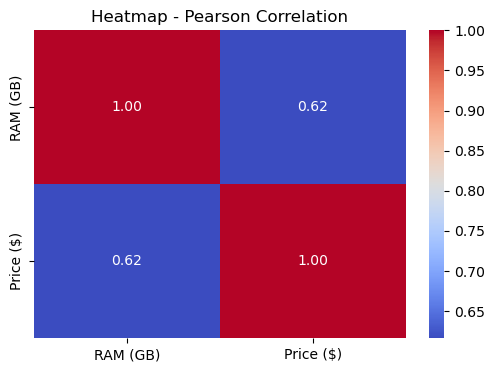

In [33]:
correlation_pearson = df[['RAM (GB)', 'Price ($)']].corr(method='pearson')

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap - Pearson Correlation")
plt.show()

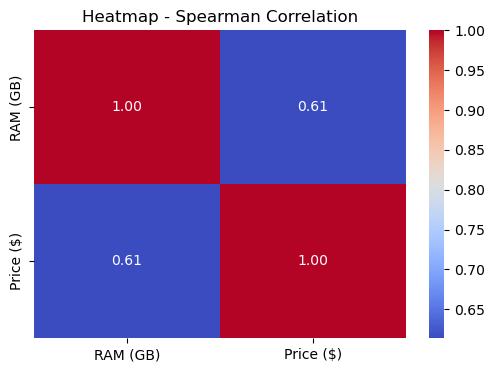

In [34]:
correlation_spearman = df[['RAM (GB)', 'Price ($)']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap - Spearman Correlation")
plt.show()

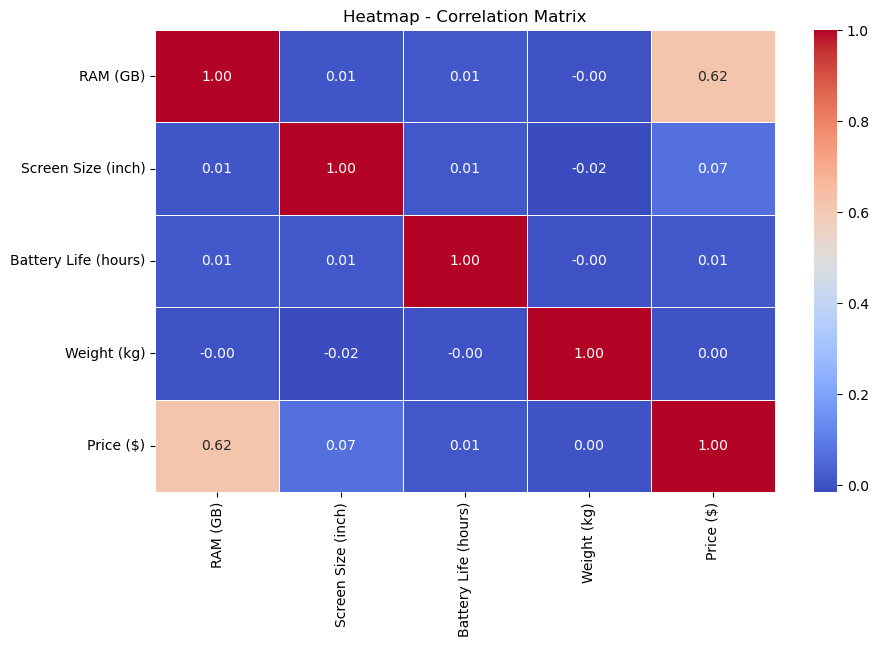

In [35]:
numeric_cols = df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap - Correlation Matrix")
plt.show()

In [12]:
df['Brand'].value_counts()

Brand
Apple        1262
HP           1208
MSI          1190
Microsoft    1175
Dell         1170
Asus         1165
Acer         1165
Samsung      1163
Lenovo       1145
Razer        1125
Name: count, dtype: int64

In [13]:
df['Processor'].unique()

array(['AMD Ryzen 3', 'AMD Ryzen 7', 'Intel i5', 'Intel i3',
       'AMD Ryzen 9', 'AMD Ryzen 5', 'Intel i9', 'Intel i7'], dtype=object)

In [14]:
df['Processor'].nunique()

8

In [15]:
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [16]:
inconsistent_data = df[df['RAM (GB)'] > 64]
print(inconsistent_data)

Empty DataFrame
Columns: [Brand, Processor, RAM (GB), Storage, GPU, Screen Size (inch), Resolution, Battery Life (hours), Weight (kg), Operating System, Price ($)]
Index: []


In [17]:
df.duplicated().sum()

0